In [16]:
!pip install "numpy<1.24" --user

import numpy as np

In [17]:
import pandas as pd

In [18]:
import matplotlib.pyplot as plt
import geopandas as gpd

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 40)

In [53]:
# Collecte des données

data = pd.read_csv("Donnees-sur-le-parc-de-vehicule-au-niveau-regional.2023-05.csv", sep=';',header=[1])
zones = gpd.read_file('aires.geojson')

In [20]:
variables = ['PARC_2011','PARC_2012','PARC_2013','PARC_2014','PARC_2015','PARC_2016','PARC_2017','PARC_2018','PARC_2019','PARC_2020','PARC_2021','PARC_2022']
regions = data['REGION_LIBELLE'].unique()
regionsr = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Grand Est', 'Guadeloupe',
       'Guyane', 'Hauts-de-France', 'La Réunion',
       'Martinique', 'Mayotte', 'Normandie', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur",
       'Île-de-France']
regionsmet = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand Est', 
        'Hauts-de-France', 'Normandie', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur",
       'Île-de-France']
regionsmethorsb = ['Auvergne-Rhône-Alpes', 'Bretagne',
       'Centre-Val de Loire', 'Grand Est', 
        'Hauts-de-France', 'Normandie', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur",
       'Île-de-France']
critair = data['CRITAIR'].unique()

In [138]:
# On créé le Data Frame avec le nombre de véhicules par années, sans distinction de région.

# On se focalise sur les véhicules particuliers et les camionnettes
df = data.loc[(data["CATEGORIE_VEHICULE"] == "Véhicule particulier") | (data["CATEGORIE_VEHICULE"] == "Dérivé VP") | (data["CATEGORIE_VEHICULE"] == "Camionnette")]

def age_num(age) :
    res = []
    for i in range (len(age)) :
        res.append(int(str(age[i])[0:2]))
    return res

# On créé une colonne avec l'âge du véhicule sous forme numérique
df.insert(loc = 1, column = 'AGE_NUM', value = age_num(np.array(df['AGE'], dtype = str)))

# On peut se séparer de certaines colonnes
df = df.drop(['REGION_CODE', 'REGION_LIBELLE', 'CLASSE_VEHICULE', 'STATUT_UTILISATEUR', 'AGE'], axis = 1)
df = df.sort_values(by = ['CATEGORIE_VEHICULE','CARBURANT','CRITAIR', 'AGE_NUM'])

# On effectue la somme pour les différentes régions et statuts d'utilisateurs
df = df.groupby(['CATEGORIE_VEHICULE','CARBURANT','CRITAIR', 'AGE_NUM'], as_index = False).sum()

def final_age(age) :
    res = []
    for i in range (len(age) - 1) :
        if age[i] < age[i+1] :
            res.append(0)
        else : 
            res.append(1)
    res.append(1)
    return res

# La colonne "FINAL_AGE", binaire, donne l'information sur la présence ou non de véhicules du même type
# mais plus agés dans le Data Frame, elle nous sert à connaître les frontières entre chaque type de 
# véhicule
df.insert(loc = 2, column = 'FINAL_AGE', value = final_age(np.array(df['AGE_NUM'], dtype = int)))

df = df.groupby(['CATEGORIE_VEHICULE','CARBURANT','CRITAIR', 'AGE_NUM']).sum()
df = df.sort_values(by = ['CATEGORIE_VEHICULE','CARBURANT','CRITAIR', 'AGE_NUM'])

df.head(10)

FINAL_AGE  PARC_2011   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          4   
                                        2                0          0   
                                        3                1          0   
                             Crit'Air 2 0                0      12225   
                                        1                0        269   
                                        2                0         15   
                                        3                0          8   
                                        4                0          6   
                                        5                0          0   

                                                 PARC_2012  PARC_2013   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          0   
                                        2                2          0   
                                        3                0          2   
                             Crit'Air 2 0           133674     240464   
                                        1            12001     132940   
                                        2              267      11792   
                                        3               15        259   
                                        4                8         11   
                                        5                6          7   

                                                 PARC_2014  PARC_2015   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          0   
                                        2                0          0   
                                        3                0          0   
                             Crit'Air 2 0           252118     257630   
                                        1           238750     250556   
                                        2           128945     232600   
                                        3            11300     124073   
                                        4              241      10015   
                                        5               10        235   

                                                 PARC_2016  PARC_2017   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          0   
                                        2                0          0   
                                        3                0          0   
                             Crit'Air 2 0           265445     291117   
                                        1           255705     264229   
                                        2           243305     248360   
                                        3           223733     234790   
                                        4           112610     203943   
                                        5             9637     108358   

                                                 PARC_2018  PARC_2019   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          0   
                                        2                0          0   
                                        3                0          0   
                             Crit'Air 2 0           318619     334373   
                              

In [171]:
# On détermine nos Data Frame sur les probabilités de panne

# df2 nous servira pour le nombre absolu de pannes, df3 pour les proportions
df2 = df - df.shift(periods = - 1, axis = 0).shift(periods = -1, axis = 1)
df3 = df2/df

# On enlève toutes les lignes qui sont à la frontières entre deux types de véhicules
index = df.loc[df['FINAL_AGE'] == 1].index.tolist()

df2 = df2.drop(index)
df2 = df2.drop(['FINAL_AGE', 'PARC_2022'], axis = 1)

df3 = df3.drop(index)
df3 = df3.drop(['FINAL_AGE', 'PARC_2022'], axis = 1)

# On enlève toutes les lignes avec des valeurs négatives ou nulles, pour que ces exceptions ne soient pas 
# comptées dans les moyennes
df2 = (df2 + abs(df2))/2
df3 = (df3 + abs(df3))/2

df2.replace(0, np.nan, inplace = True)
df3.replace(0, np.nan, inplace = True)

# On prend les moyennes
pannes = df2.mean(axis = 1, skipna = True)
pannes_prop = df3.mean(axis = 1, skipna = True)

# On remplace les NaN utilisés en 0 pour que le Data Frame soit plus propre
df2.replace(np.nan, 0, inplace = True)
df3.replace(np.nan, 0, inplace = True)

print(pannes)
print(pannes_prop)


CATEGORIE_VEHICULE    CARBURANT             CRITAIR     AGE_NUM
Camionnette           Diesel                Crit'Air 1  0             1.5
                                                        1             2.0
                                                        2             NaN
                                            Crit'Air 2  0          1198.2
                                                        1          5119.0
                                                                    ...  
Véhicule particulier  Hybride rechargeable  Non classé  20            1.0
                                                        21            NaN
                                                        22            1.0
                                                        23            1.0
                                                        24            1.0
Length: 1427, dtype: float64
CATEGORIE_VEHICULE    CARBURANT             CRITAIR     AGE_NUM
Camionnette           Diesel 

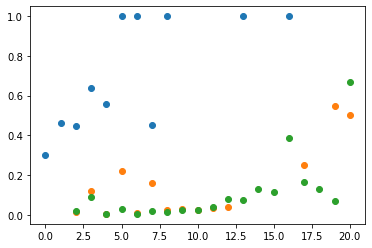

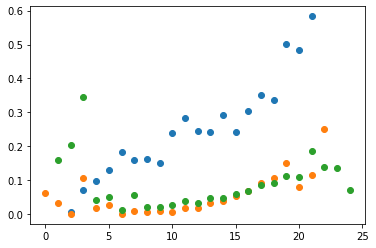

In [181]:
pannes_prop = pd.DataFrame(pannes_prop)
#pannes_prop.replace(np.nan, 0, inplace = True)

#print(pannes_prop.index.to_list())

for i in ["Crit'Air 1", "Crit'Air 2", "Crit'Air 3"] :
    for j in ["Diesel"] :
        y = pannes_prop.loc[('Véhicule particulier', j, i)]
        if np.nan not in y :
            x = np.arange(0, len(y), 1)
            labl = i + ", " + j
            plt.scatter(x, y, label = labl)

plt.show()

for i in ["Crit'Air 1", "Crit'Air 2", "Crit'Air 3"] :
    for j in ["Essence"] :
        y = pannes_prop.loc[('Véhicule particulier', j, i)]
        if np.nan not in y :
            x = np.arange(0, len(y), 1)
            labl = i + ", " + j
            plt.scatter(x, y, label = labl)

plt.show()

#print(np.array(pannes_prop.loc[('Camionnette', 'Diesel', "Crit'Air 1")]))